# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    # Collect HTML data from this page
    response = requests.get(url)
    l,
    
    
    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | If you can’t fly First Class...
1,Not Verified | Singapore to Heathrow. Busine...
2,Not Verified | I reported my damaged/ruined ...
3,"Not Verified | On March 1st, I flew from Ber..."
4,Not Verified | The WORST customer experience! ...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Data Cleaning

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import re
import string
import numpy as np

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from warnings import filterwarnings
filterwarnings ('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
reviews=pd.read_csv(r"C:\Users\shiva\Documents\British Airways\BA_reviews.csv")
reviews=reviews.pop('reviews')
reviews

0      ✅ Trip Verified | If you can’t fly First Class...
1      Not Verified |   Singapore to Heathrow. Busine...
2      Not Verified |   I reported my damaged/ruined ...
3      Not Verified |   On March 1st, I flew from Ber...
4      Not Verified | The WORST customer experience! ...
                             ...                        
995    ✅ Trip Verified |  London Heathrow to Dubai. L...
996    Not Verified |  London to Seattle. My husband ...
997    ✅ Trip Verified |  Johannesburg to London. I b...
998    ✅ Trip Verified |  London to Milan. Evening ou...
999    ✅ Trip Verified |  The connecting flight to Jo...
Name: reviews, Length: 1000, dtype: object

we will create a column which mentions if the user is verified or not

In [7]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation,'')
    return text    

In [18]:
reviews=reviews.str.replace('Trip Verified |','')
reviews=reviews.str.replace('✅','')
reviews=reviews.str.replace('|','')
reviews=reviews.str.replace(r'\b(\w{1,3})\b', '')
reviews=reviews.apply(remove_punctuations)
reviews

0        If you can’t fly First Class don’t fly Briti...
1      Not Verified    Singapore to Heathrow Business...
2      Not Verified    I reported my damagedruined su...
3      Not Verified    On March 1st I flew from Berli...
4      Not Verified  The WORST customer experience Br...
                             ...                        
995       London Heathrow to Dubai Last Sunday we unf...
996    Not Verified   London to Seattle My husband an...
997       Johannesburg to London I booked a seat with...
998       London to Milan Evening outbound flight wit...
999       The connecting flight to Johannesburg was o...
Name: reviews, Length: 1000, dtype: object

In [19]:
reviews.shape

(1000,)

In [45]:
freq_words=pd.Series(' '.join(reviews).lower().split()).value_counts()[:50]
freq_words

the        7405
to         5439
and        4531
a          3334
was        3303
i          3125
in         2106
of         2073
flight     1944
on         1837
for        1745
not        1437
with       1409
we         1368
my         1357
that       1236
ba         1223
it         1164
they       1159
is         1146
were       1087
at         1082
had         991
but         932
this        908
have        879
no          842
as          819
from        758
service     733
me          679
our         628
so          600
an          585
very        583
be          549
time        539
you         538
london      503
are         501
there       462
seat        455
class       446
crew        443
british     438
which       431
food        430
all         426
airways     426
when        425
Name: count, dtype: int64

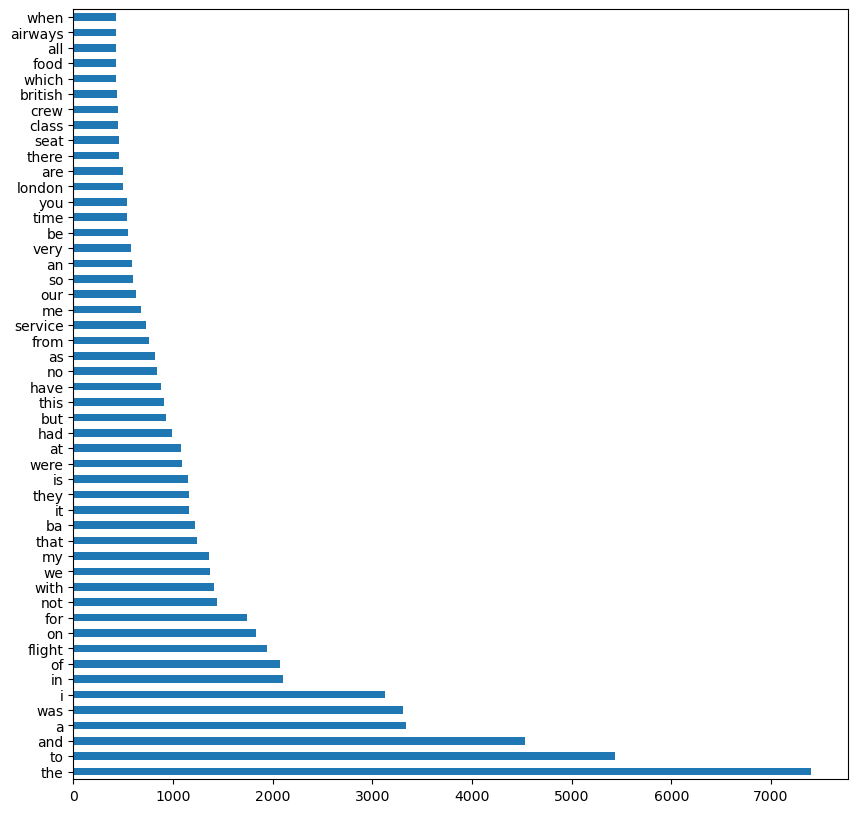

In [21]:
plt.figure(figsize=(10,10))
freq_words.plot.barh(x=freq_words[0],y=freq_words[1])
plt.show()

Text Clustering

In [22]:
categories=['negative','positive']
num_cat=len(categories)
num_cat

2

In [23]:
#TF-IDF Feature Generation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer


# Initialize regex tokenizer
tokenizer= RegexpTokenizer(r'\w+')

# vectorizer document using TF-IDF
tf_idf_vect=TfidfVectorizer(lowercase=True,
                           stop_words='english',
                           ngram_range=(1,1),
                           tokenizer=tokenizer.tokenize)
#fit and Transform Text Data
reviews_count=tf_idf_vect.fit_transform(reviews)
# check shape of count vector
reviews_count.shape

(1000, 7869)

In [24]:
#import KMEANS Model
from sklearn.cluster import KMeans

#create Kmeans object and fit it to the training data
kmeans=KMeans(n_clusters=num_cat).fit(reviews_count)

# Get the labels using Kmeans
pred_labels=kmeans.labels_
pred_labels

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [25]:
cluster_centres=kmeans.cluster_centers_
cluster_centres

array([[0.00023199, 0.00034426, 0.        , ..., 0.00014666, 0.        ,
        0.00014666],
       [0.00063126, 0.        , 0.00027288, ..., 0.        , 0.00022286,
        0.        ]])

In [28]:
unique,counts=np.unique(pred_labels,return_counts=True)
dict(zip(unique,counts))

{0: 447, 1: 553}

In [38]:
from sklearn import metrics

#compute DBI score 
dbi=metrics.davies_bouldin_score(reviews_count.toarray(),pred_labels)

#Compute Silhoutte Score
ss=metrics.silhouette_score(reviews_count.toarray(),pred_labels,metric='euclidean')

#print the DBI and Silhoutte Score
print('DBI Score: ',dbi,'\nSilhoute Score: ',ss)

DBI Score:  10.331426052979147 
Silhoute Score:  0.008361648819849334


In [39]:
df_reviews=pd.DataFrame({'review':reviews,'label':pred_labels})
df_reviews

,review,label
0,If you can’t fly First Class don’t fly Briti...,1
1,Not Verified Singapore to Heathrow Business...,1
2,Not Verified I reported my damagedruined su...,0
3,Not Verified On March 1st I flew from Berli...,0
4,Not Verified The WORST customer experience Br...,0
...,...,...
995,London Heathrow to Dubai Last Sunday we unf...,0
996,Not Verified London to Seattle My husband an...,1
997,Johannesburg to London I booked a seat with...,0
998,London to Milan Evening outbound flight wit...,1


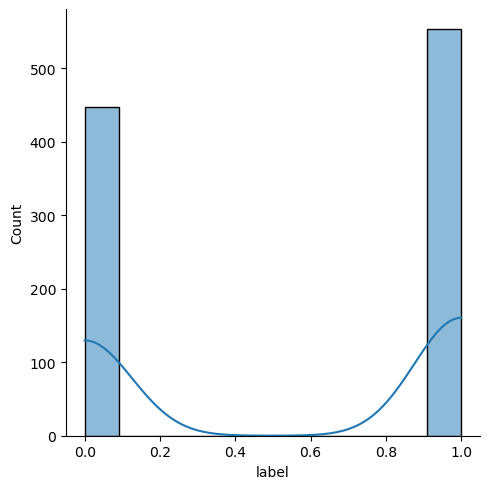

In [40]:
sns.displot(df_reviews['label'],kde=True) 

In [42]:
positive_review=df_reviews[df_reviews['label']==1]
positive_review

,review,label
0,If you can’t fly First Class don’t fly Briti...,1
1,Not Verified Singapore to Heathrow Business...,1
7,This is a route I fly regularly Used first c...,1
8,While BA may have made some positive improv...,1
9,British Airways new Club Suite is a marked i...,1
...,...,...
989,Flight was delayed by almost two hours and ...,1
994,London to Delhi A truly first class experie...,1
996,Not Verified London to Seattle My husband an...,1
998,London to Milan Evening outbound flight wit...,1


In [43]:
negative_review=df_reviews[df_reviews['label']==0]
negative_review

,review,label
2,Not Verified I reported my damagedruined su...,0
3,Not Verified On March 1st I flew from Berli...,0
4,Not Verified The WORST customer experience Br...,0
5,Not Verified Had to cancel my flight months...,0
6,Flight cancelled with no reason given less t...,0
...,...,...
991,Gatwick to Madrid When I arrived I waited f...,0
992,My boyfriend and I wanted to return from ou...,0
993,I had kept my laptop bag in the overhead ca...,0
995,London Heathrow to Dubai Last Sunday we unf...,0


In [46]:
pwd

'C:\\Users\\shiva\\Documents\\British Airways'